<a href="https://colab.research.google.com/github/isabela1s/coins_counter/blob/main/MAC019_AULA08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt

from anastruct import SystemElements

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 30.3 MB/s eta 0:00:00


### **Parte I**

**Exemplo:** Vamos representar a viga a seguir utilizando o anastruct para obter as reações de apoio e os diagramas de esforços internos.

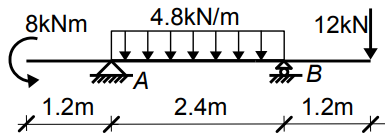

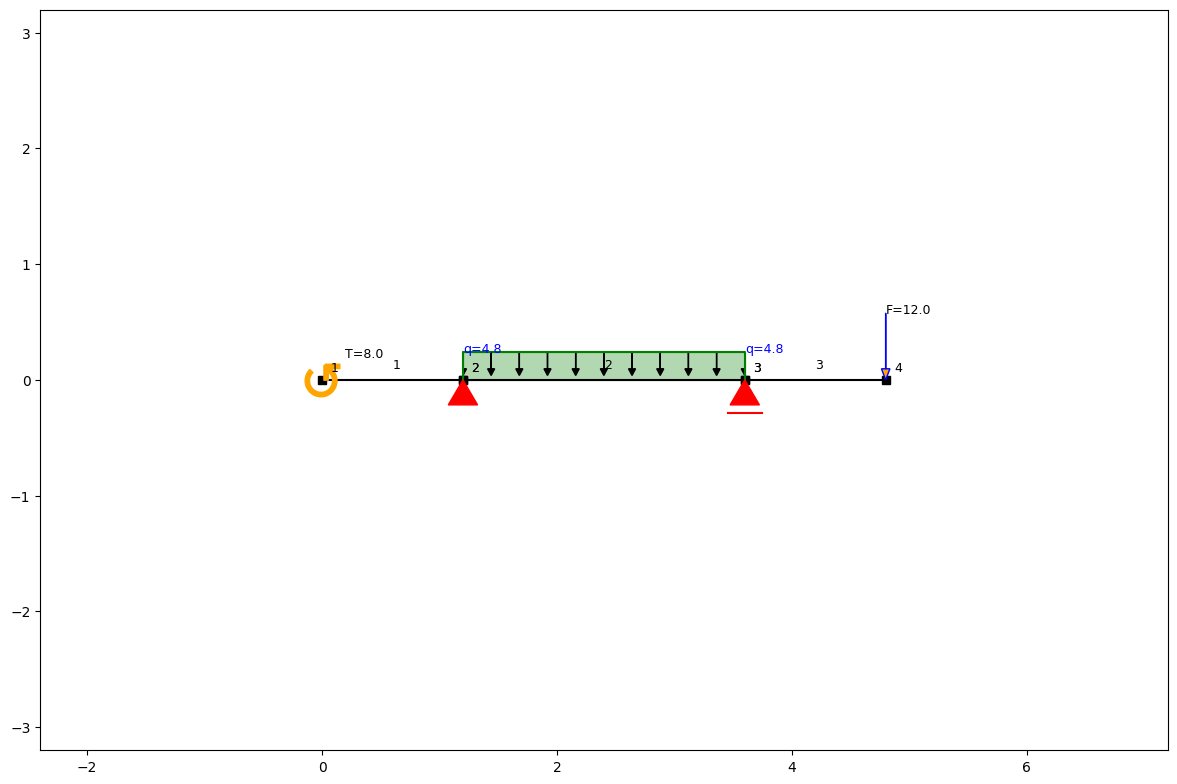

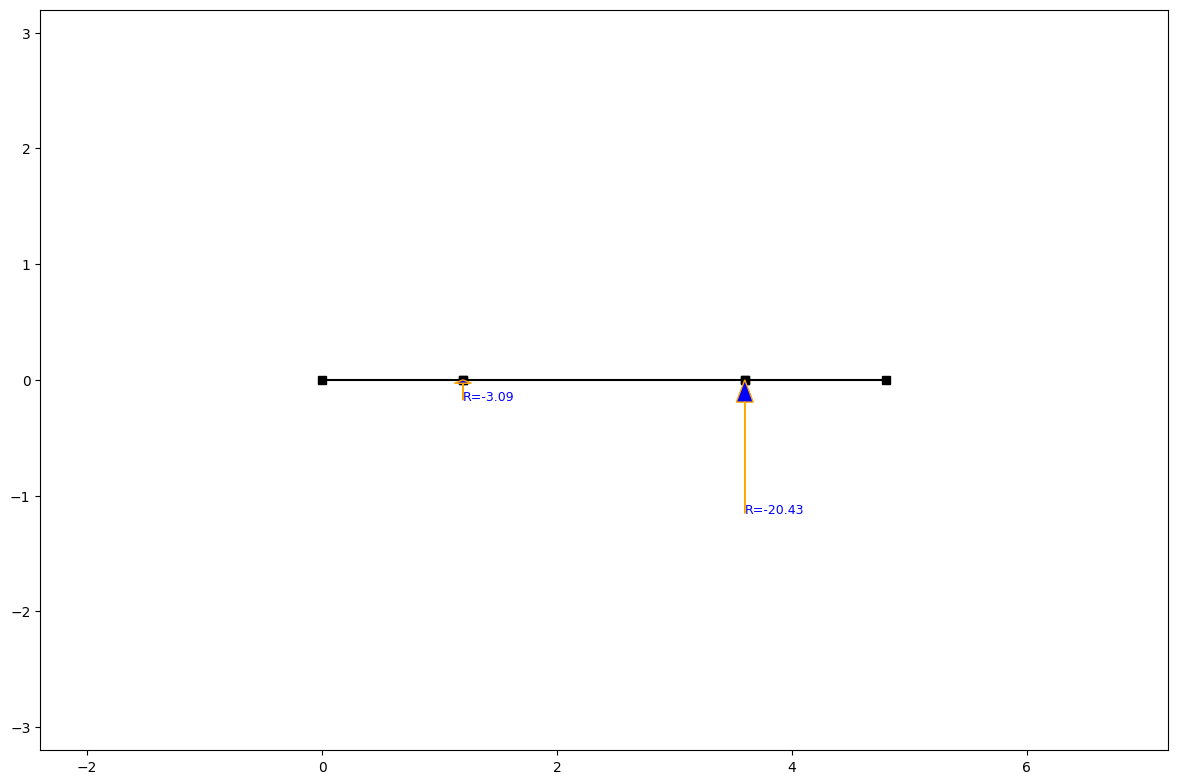

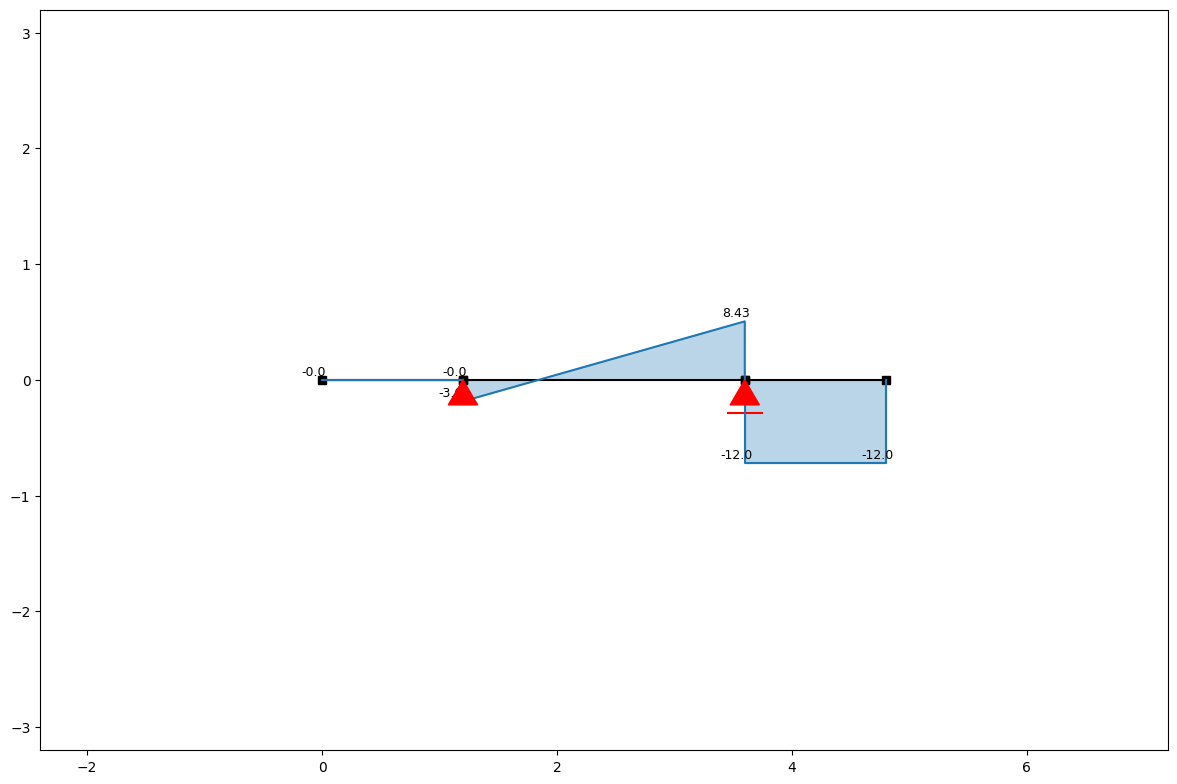

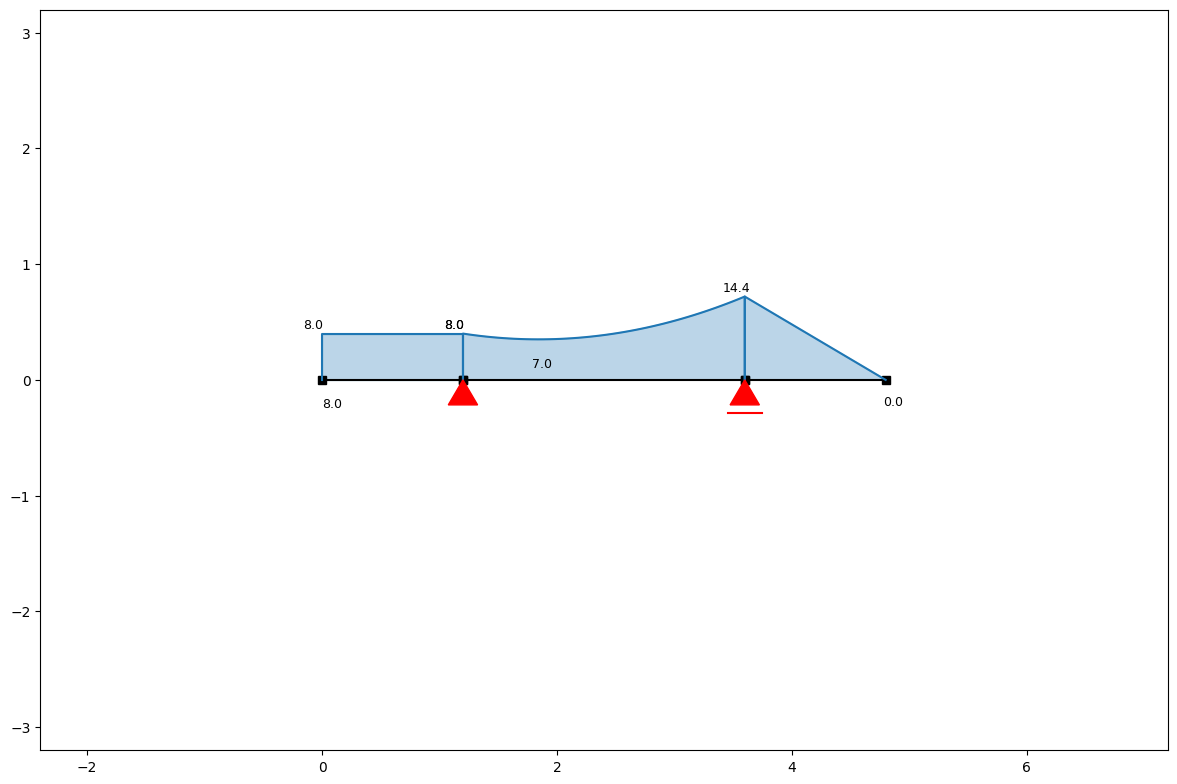

In [ ]:
# SOLUÇÃO 1:

ss = SystemElements()

# Definição dos elementos
elements = [
    [ [0, 0],   [1.2, 0] ], # elemento 1
    [ [1.2, 0], [3.6, 0] ], # elemento 2
    [ [3.6, 0], [4.8, 0] ], # elemento 3
   ]

# Definição da viga
for e in elements:
  ss.add_element(location = e)

# Apoios
ss.add_support_hinged(node_id=2)
ss.add_support_roll(node_id=3, direction='x')

# Carregamento
ss.moment_load(node_id=1, Ty=8)
ss.q_load(q=-4.8, element_id=2, direction='element')
ss.point_load(node_id=4, Fy=-12)

ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_shear_force()
ss.show_bending_moment()

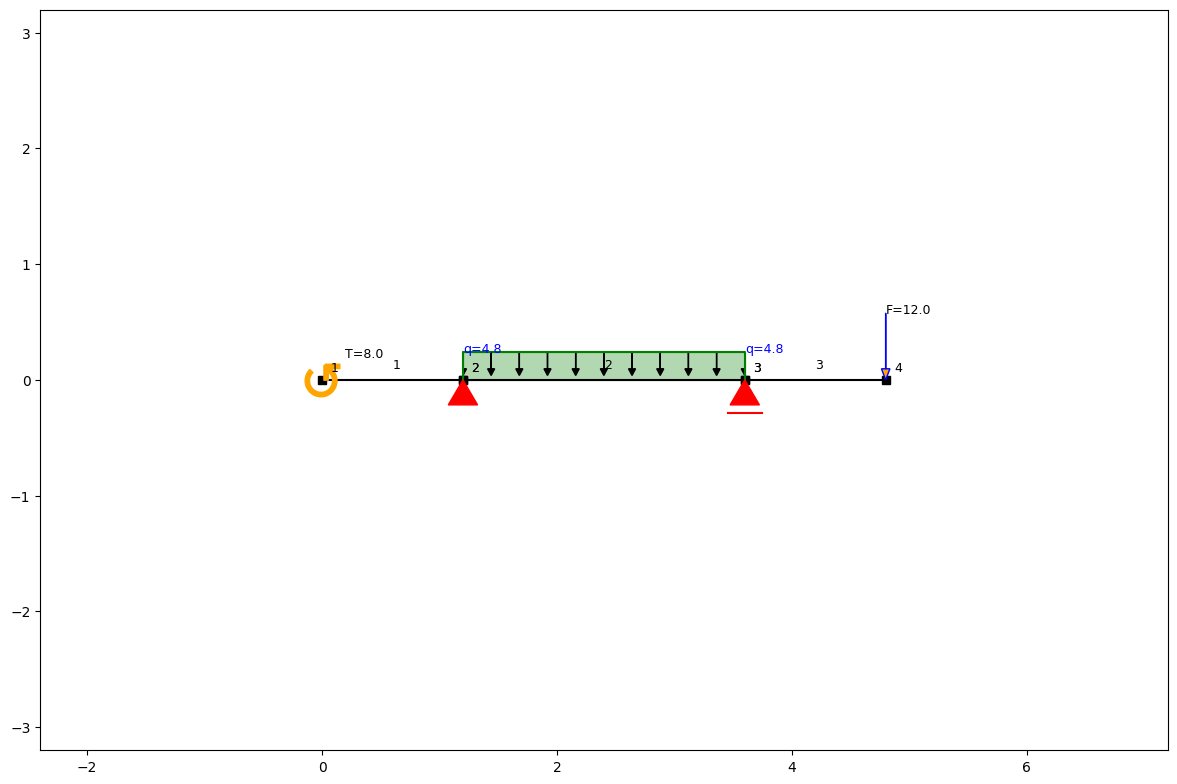

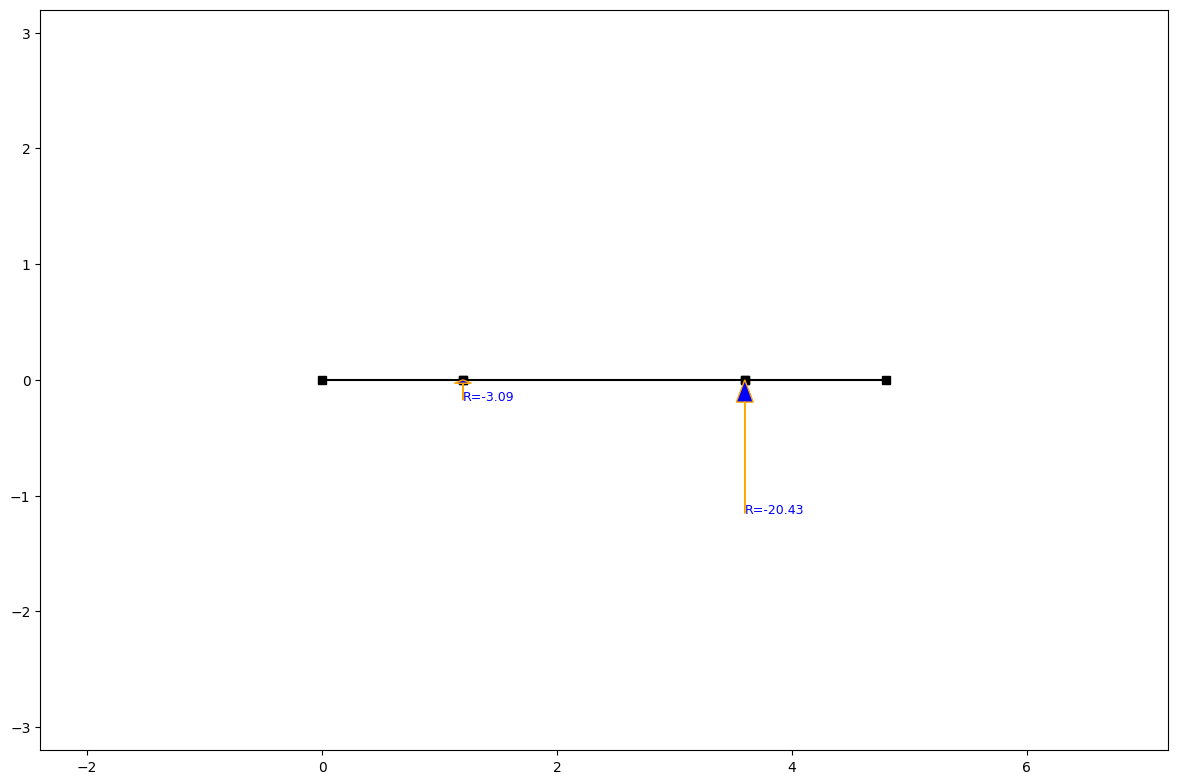

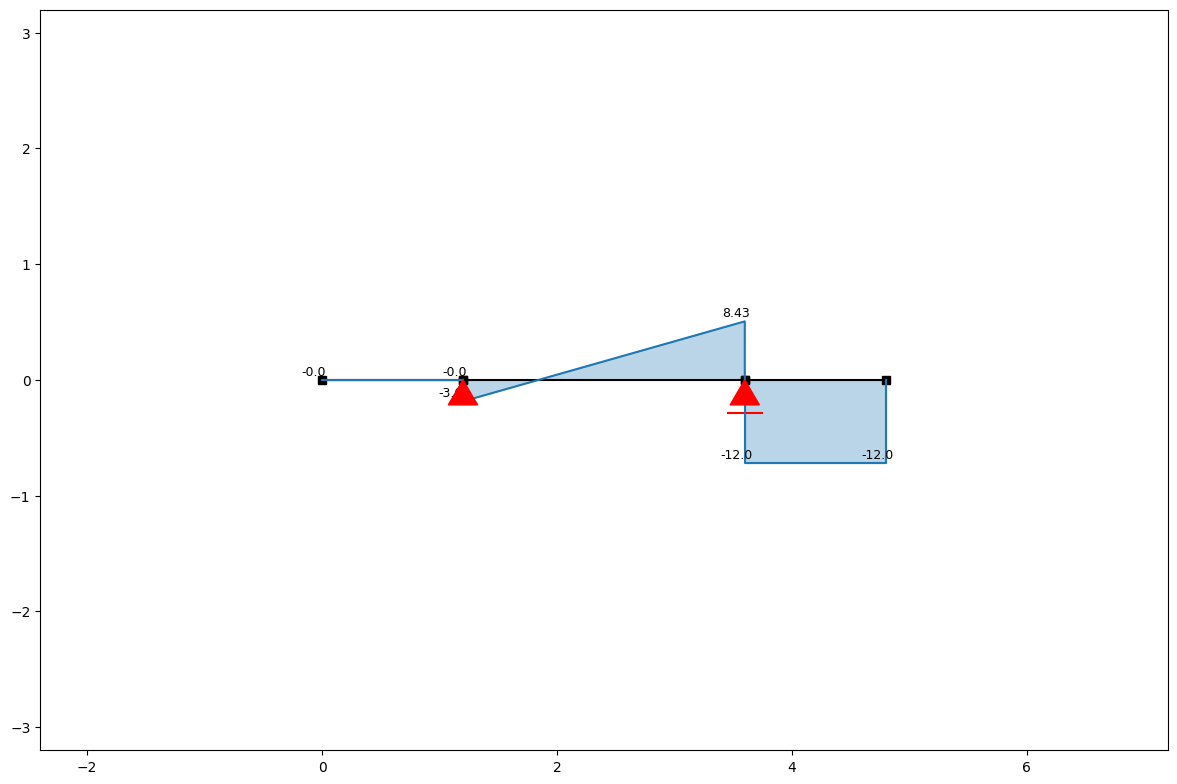

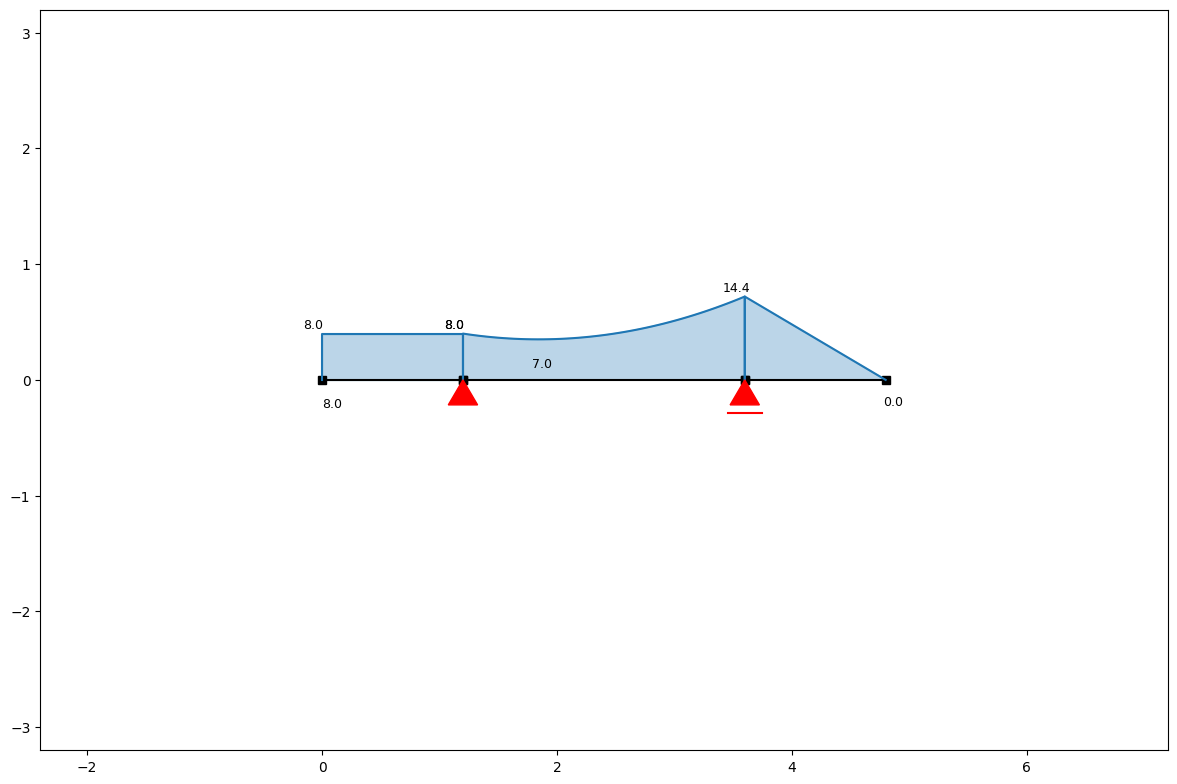

In [ ]:
# SOLUÇÃO 2:

ss = SystemElements()

# Elemento 1
ss.add_element(location = [[0, 0], [1.2, 0]])
ss.moment_load(node_id=1, Ty=8)
ss.add_support_hinged(node_id=ss.id_last_node)

# Elemento 2
ss.add_element(location = [[1.2, 0], [3.6, 0]])
ss.q_load(q=-4.8, element_id=ss.id_last_element, direction='element')
ss.add_support_roll(node_id=ss.id_last_node, direction='x')

# Elemento 3
ss.add_element(location = [[3.6, 0], [4.8, 0]])
ss.point_load(node_id=ss.id_last_node, Fy=-12)

ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_shear_force()
ss.show_bending_moment()

**Exercício 1:**

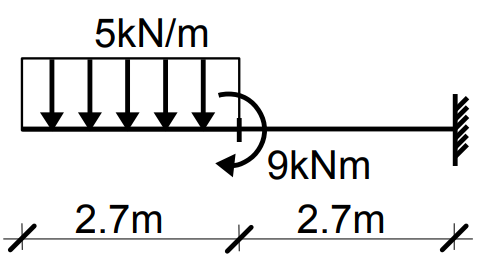

**Exercício 2:**

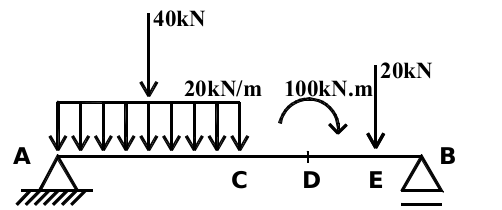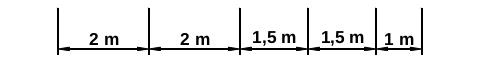

### **Parte II**

Agora queremos resolver uma viga com **carregamento triangular**. O anastruct não possui um carregamento desse tipo, então precisamos buscar uma solução aproximada.

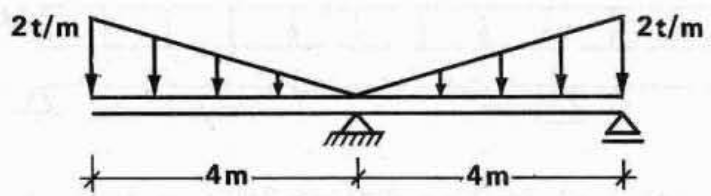

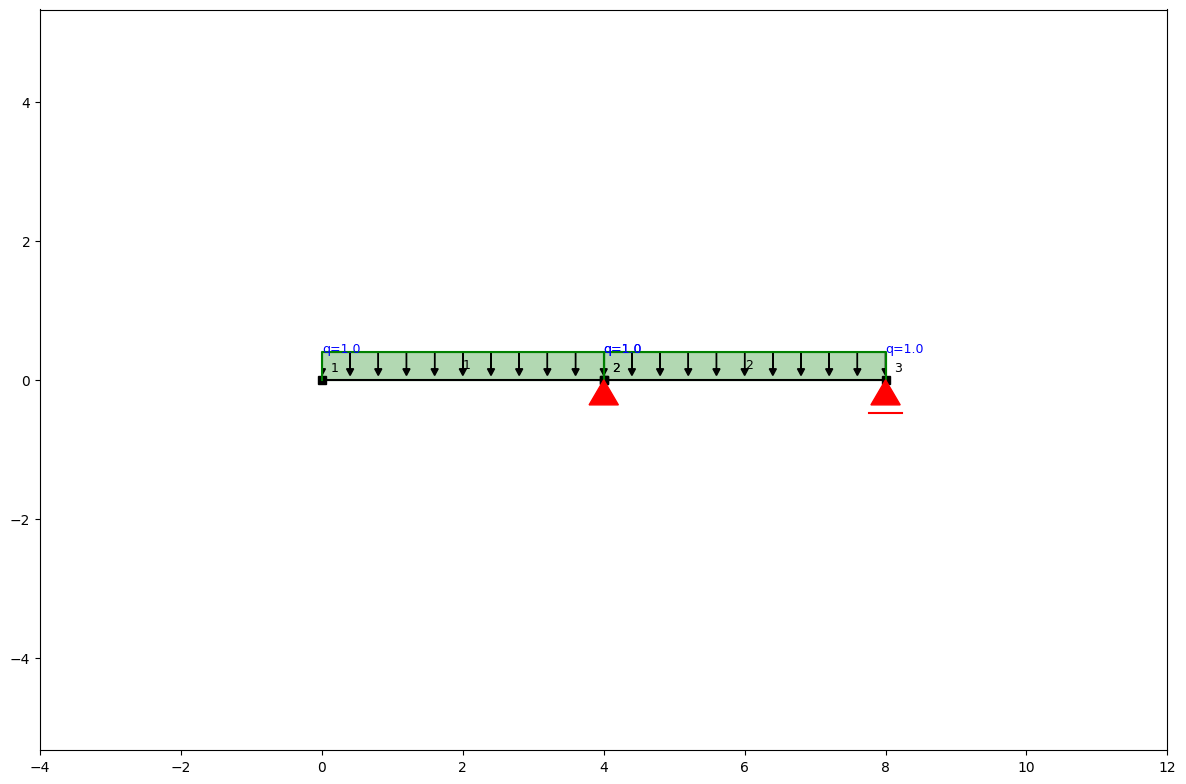

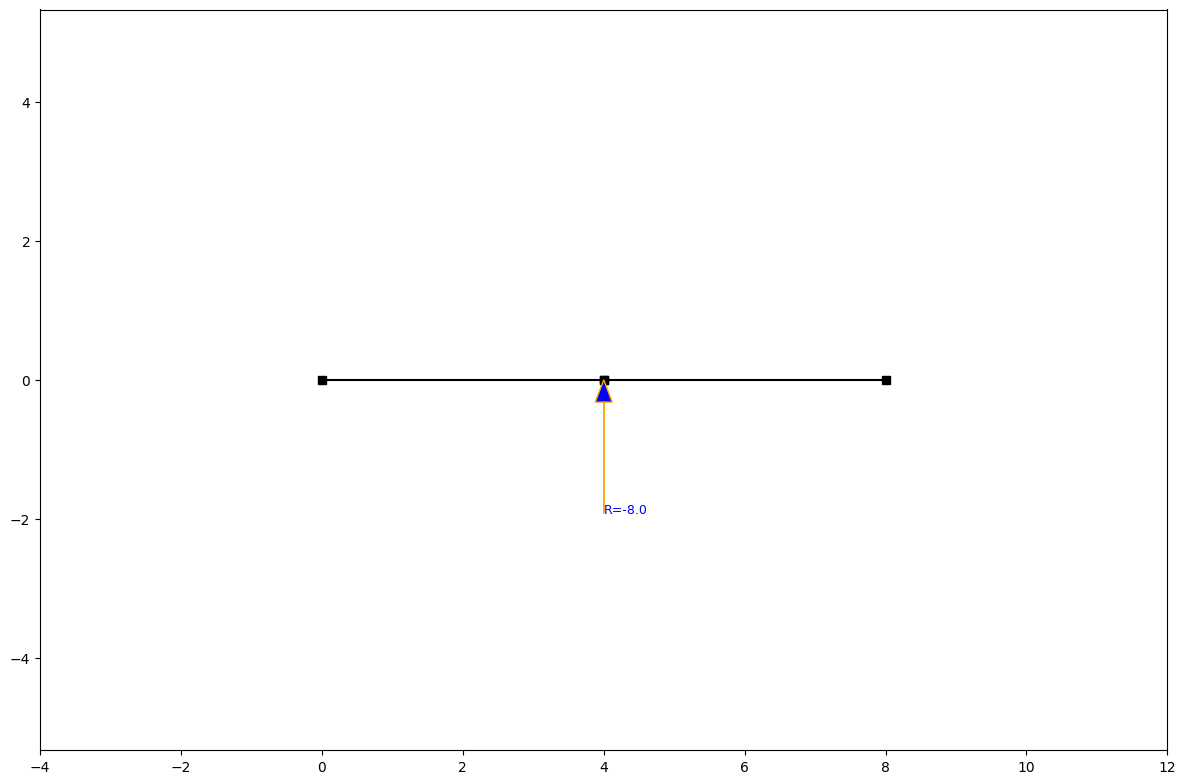

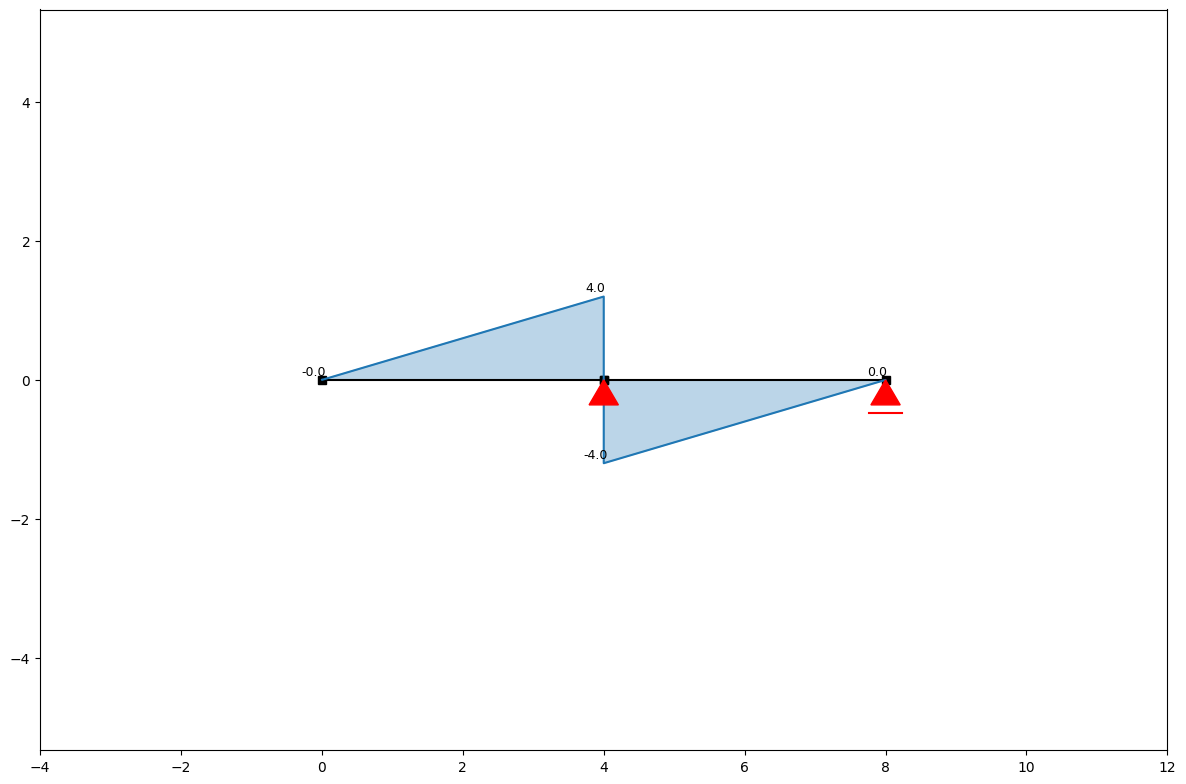

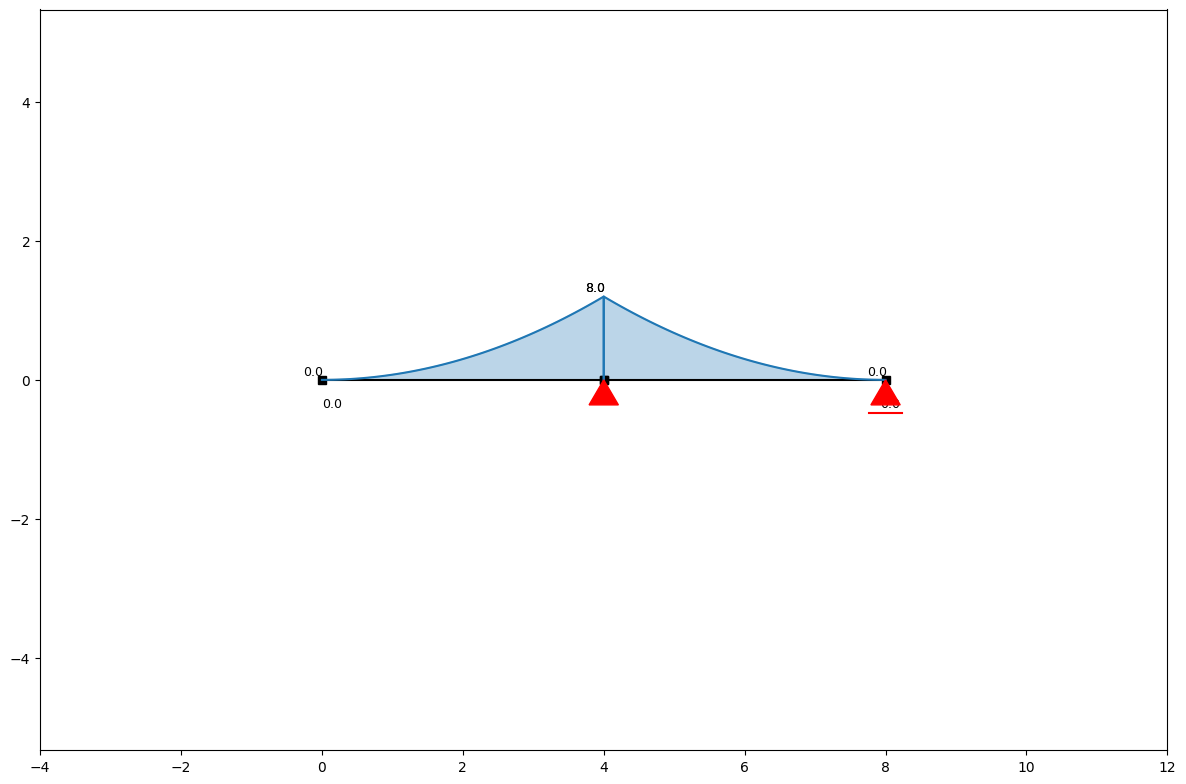

In [ ]:
# 1ª solução: Substituir a carga triangular por uma carga uniformemente distribuída

"""
Sistema original:
Fr_1 = (2 * 4) / 2 = 4 kN; xr_1 = (1 / 3) * 4 = 4 / 3 = 1.3333 m
Fr_2 = (2 * 4) / 2 = 4 kN; xr_2 = 4 + (2 / 3) * 4 = 20 / 3 = 6.6667 m
Fr_total = 8 kN

Sistema substituto (carga unif. distribuída de 1 kN/m):
Fr = 1 * 8 = 8 kN; xr = (1 / 2) * 8 = 4 m
"""

ss = SystemElements()

# Elemento 1
ss.add_element(location = [[0, 0], [4, 0]])
ss.add_support_hinged(node_id=ss.id_last_node)
ss.q_load(q=-1, element_id=ss.id_last_element, direction='element')

# Elemento 2
ss.add_element(location = [[4, 0], [8, 0]])
ss.add_support_roll(node_id=ss.id_last_node, direction='x')
ss.q_load(q=-1, element_id=ss.id_last_element, direction='element')

ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_shear_force()
ss.show_bending_moment()

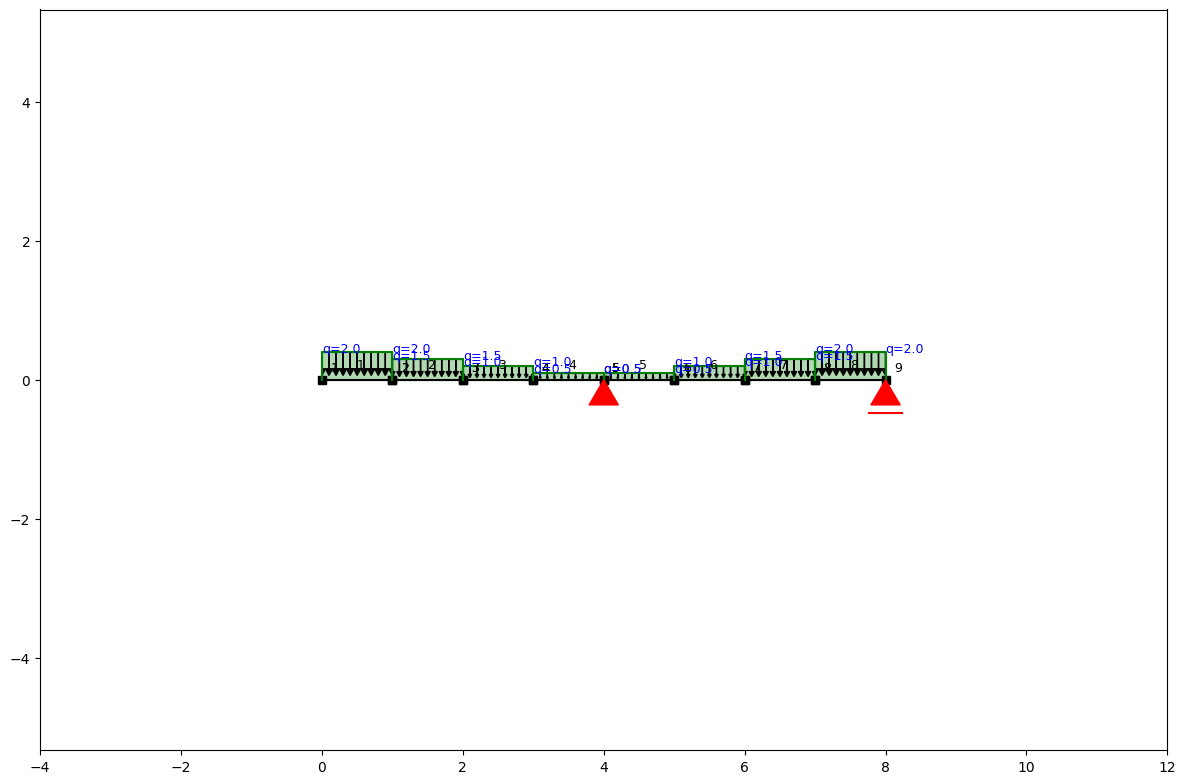

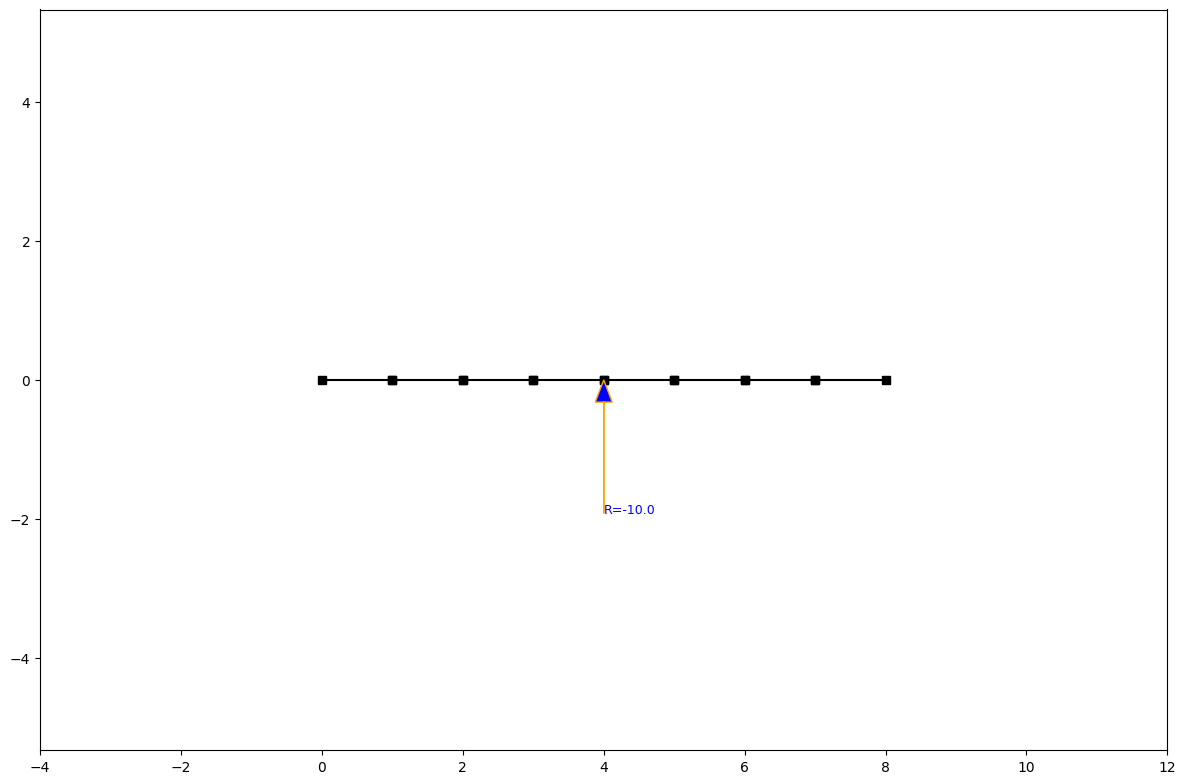

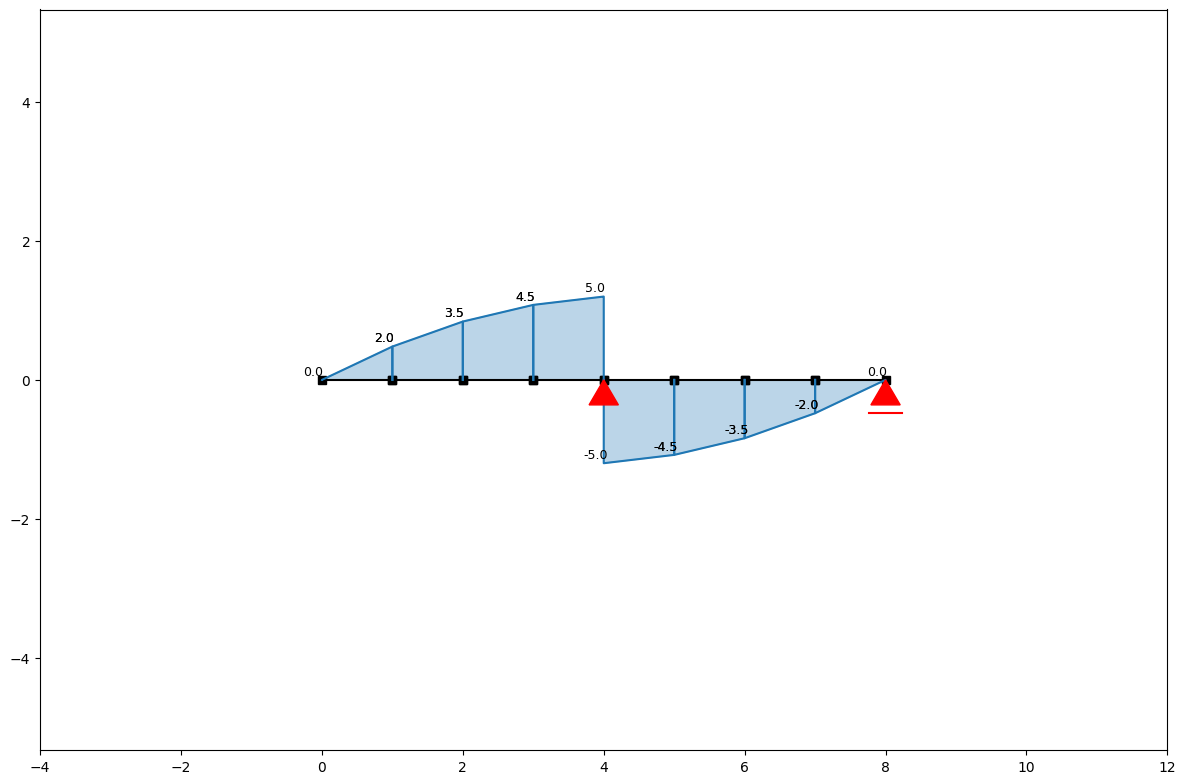

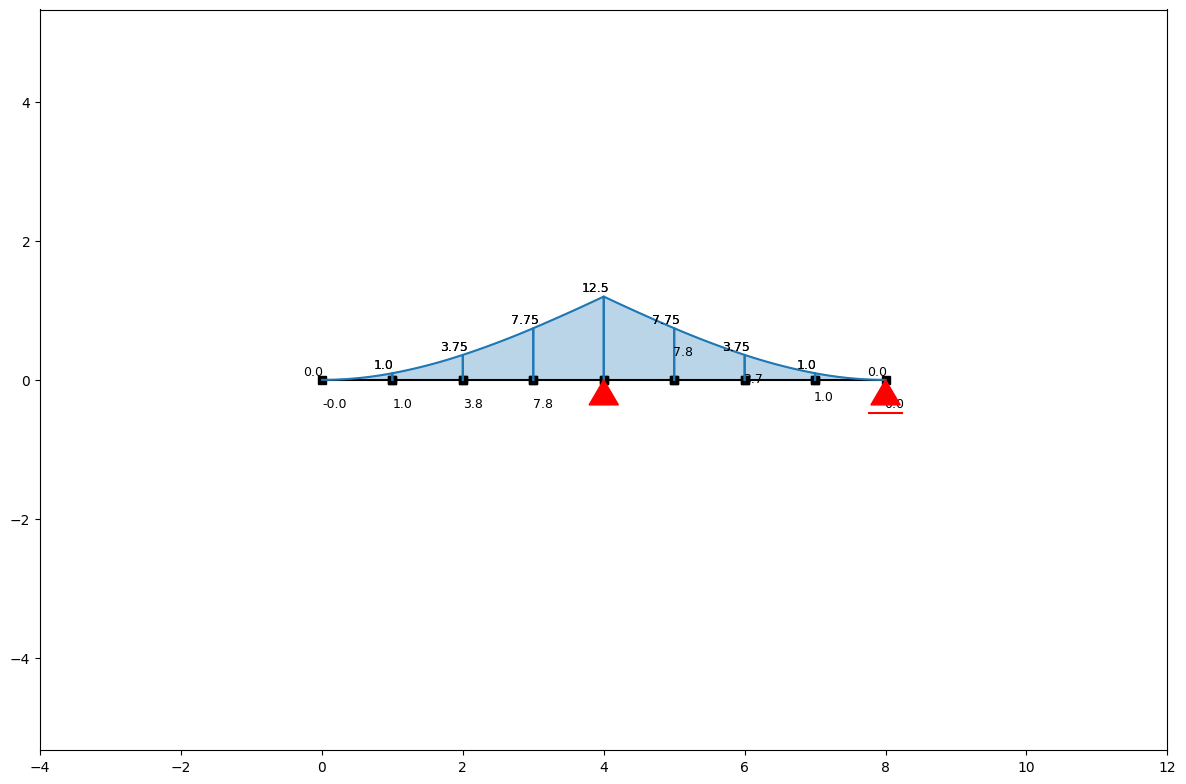

In [ ]:
# 2ª solução: Substituir a carga triangular por várias cargas unif. distribuídas

ss = SystemElements()

ss = SystemElements()

# Elemento 1
ss.add_element(location = [[0, 0], [1, 0]])
ss.q_load(q=-2, element_id=ss.id_last_element, direction='element')

# Elemento 2
ss.add_element(location = [[1, 0], [2, 0]])
ss.q_load(q=-1.5, element_id=ss.id_last_element, direction='element')

# Elemento 3
ss.add_element(location = [[2, 0], [3, 0]])
ss.q_load(q=-1, element_id=ss.id_last_element, direction='element')

# Elemento 4
ss.add_element(location = [[3, 0], [4, 0]])
ss.q_load(q=-0.5, element_id=ss.id_last_element, direction='element')
ss.add_support_hinged(node_id=ss.id_last_node)

# Elemento 5
ss.add_element(location = [[4, 0], [5, 0]])
ss.q_load(q=-0.5, element_id=ss.id_last_element, direction='element')

# Elemento 6
ss.add_element(location = [[5, 0], [6, 0]])
ss.q_load(q=-1, element_id=ss.id_last_element, direction='element')

# Elemento 7
ss.add_element(location = [[6, 0], [7, 0]])
ss.q_load(q=-1.5, element_id=ss.id_last_element, direction='element')

# Elemento 8
ss.add_element(location = [[7, 0], [8, 0]])
ss.q_load(q=-2, element_id=ss.id_last_element, direction='element')
ss.add_support_roll(node_id=ss.id_last_node, direction='x')

ss.show_structure()
ss.solve()
ss.show_reaction_force()
ss.show_shear_force()
ss.show_bending_moment()

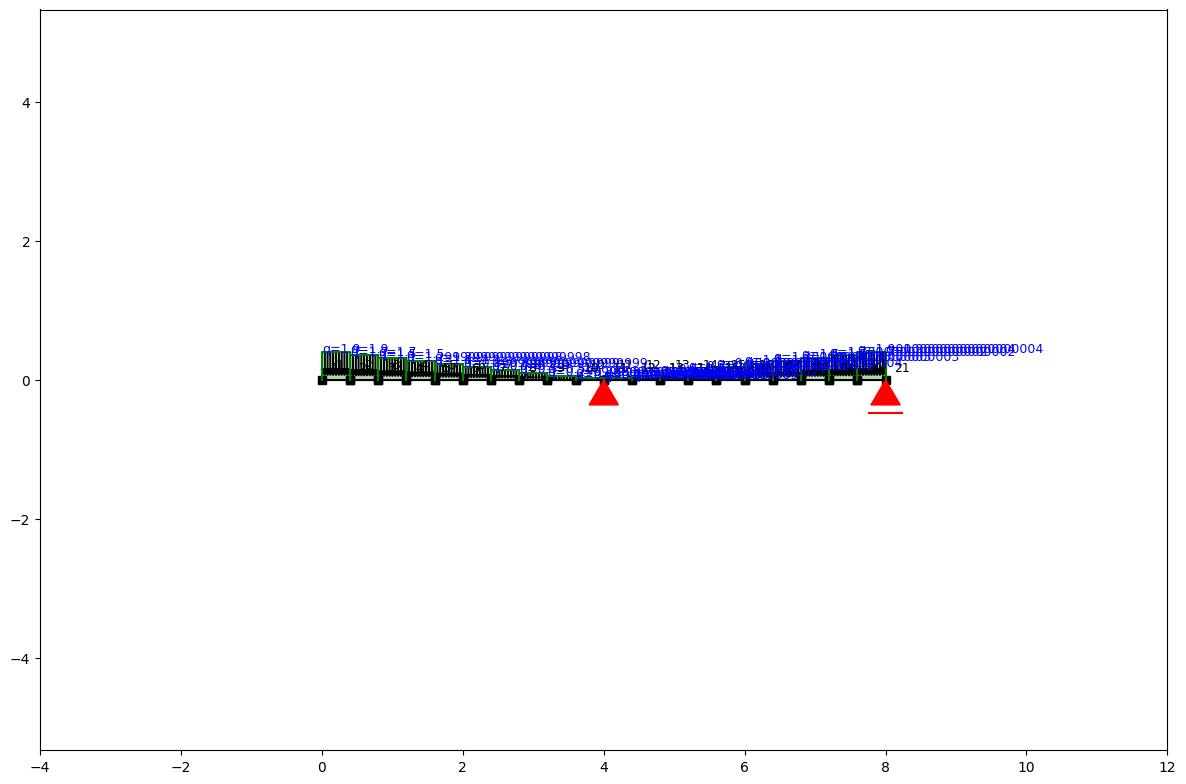

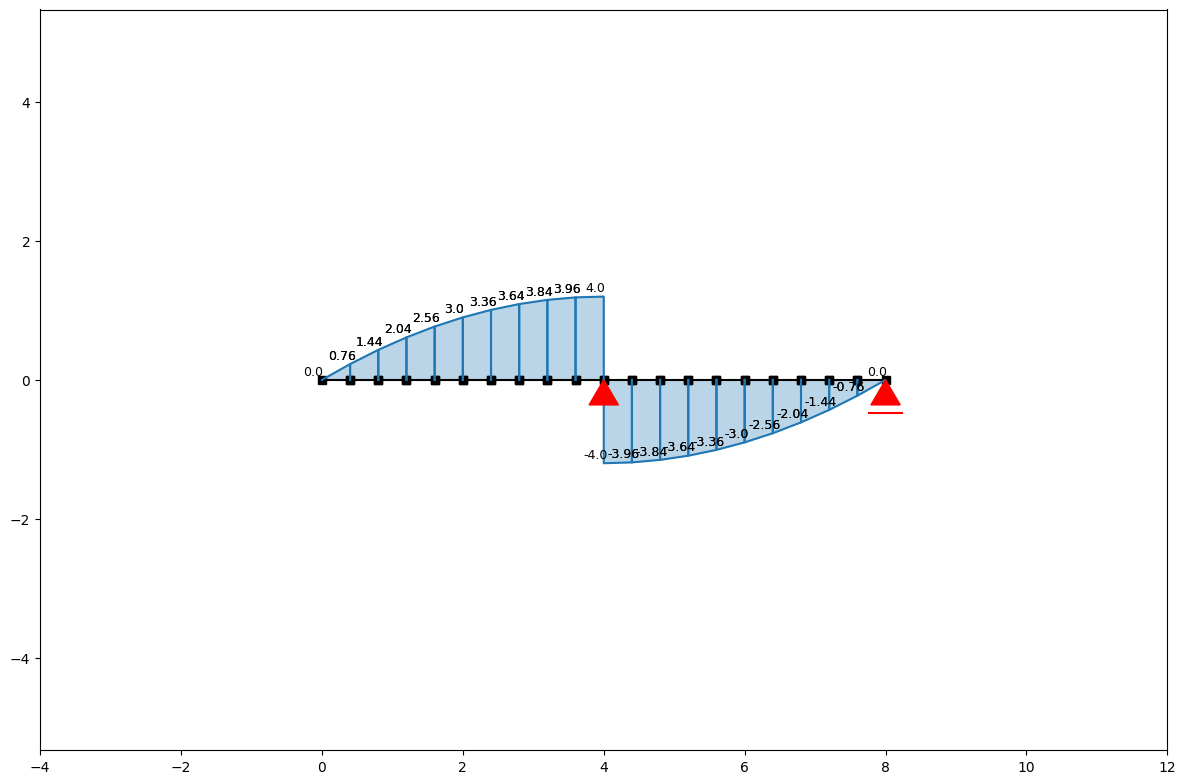

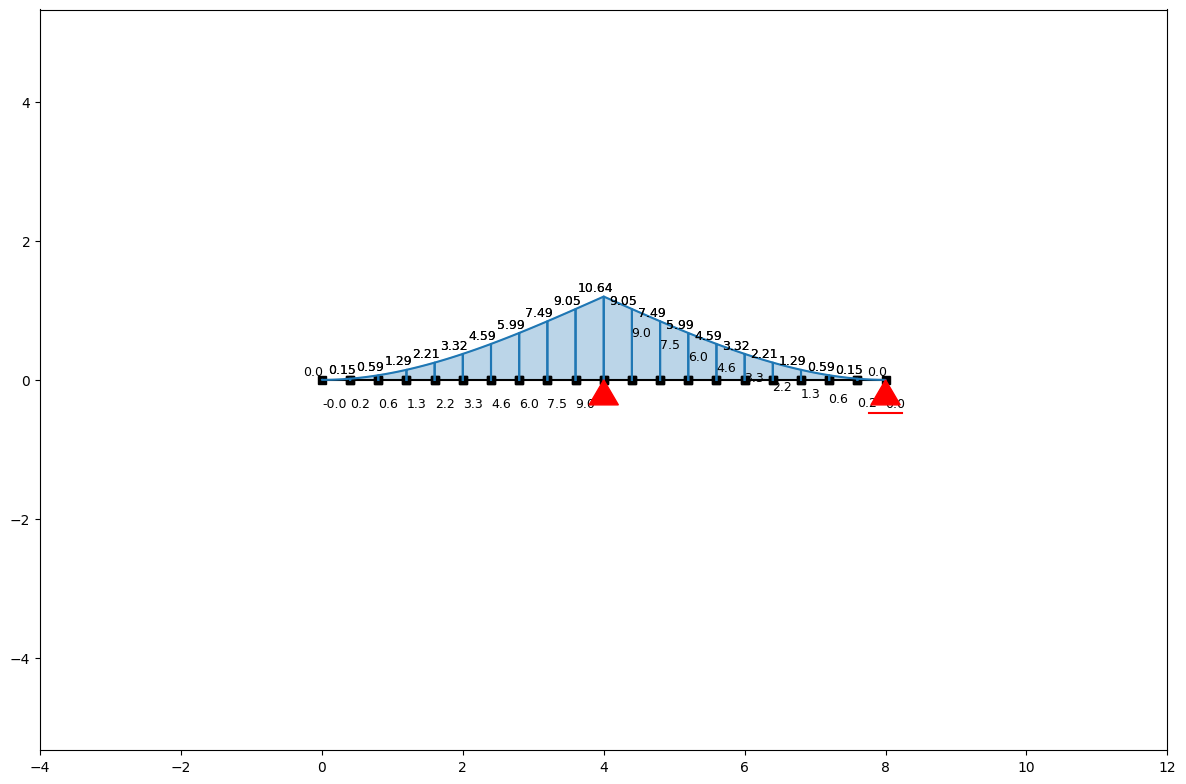

In [ ]:
# 2ª solução: Versão 2 (+ geral)

N = 20  # nº de elementos
q_max = 2  # carga máxima no início/final do trecho
L = 8  # comprimento total da viga (6 m)

N_tri = int(N/2) # número de elementos para cada carga triangular
L_tri = L/2 # comprimento sujeito a cada carga triangular
dx = L / N # comprimento de cada elemento

ss = SystemElements()

# 1. Trecho 1 com carga triangular (0 a L)
for i in range(N):
    ss.add_element(location=[[i * dx, 0], [(i+1) * dx, 0]])

# 2. Adição de apoios
ss.add_support_hinged(node_id=N_tri + 1)
ss.add_support_roll(node_id=ss.id_last_node, direction='x')  # último nó

# 3. Definição do carregamento
for element_id in range(1, N+1):
    x = (element_id - 0.5) * dx  # ponto médio do elemento
    if x <= L_tri:
        q = q_max * (L_tri - x) / L_tri
    else:
        q = q_max * (x - L_tri) / L_tri
    ss.q_load(q=-q, element_id=element_id, direction='element')

# Resultados
ss.solve()
ss.show_structure()
ss.show_shear_force()
ss.show_bending_moment()

Reação em B: 8.00 t
Reação em C: 0.00 t


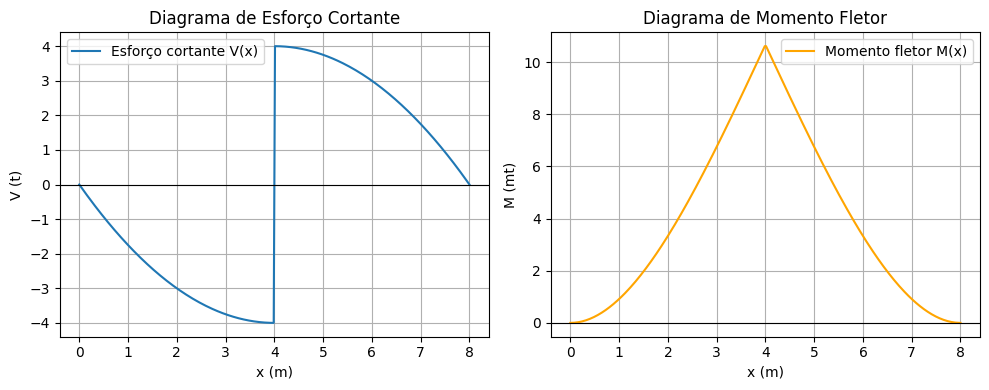

In [ ]:
# 3ª solução: Resolver usando as expressões teóricas

import numpy as np
import matplotlib.pyplot as plt

L = 8.0  # comprimento da viga (m)

# Dados da carga triangular
q_max = 2.0  # pico da carga (kN)
x_tri = L/2;

# --- Cálculo das reações ---
Q_tri = 0.5 * q_max * x_tri; # resultante da carga triangular

# Somatório de momentos em C = 0 (viga ABC)
RB = (Q_tri * ((2 / 3) * x_tri + 4) + Q_tri * (1 / 3) * x_tri) / x_tri
RC = 2*Q_tri - RB

print(f'Reação em B: {RB:.2f} t')
print(f'Reação em C: {RC:.2f} t')

# --- Carga distribuída triangular q(x) ---
def q(x):
  if 0 <= x <= L/2:
    return q_max * (x_tri - x) / x_tri
  else:
    return (q_max * (x - x_tri)) / x_tri

# --- Esforço cortante V(x) ---
def V(x):
    if 0 <= x <= x_tri:
      return - (q_max + q(x)) * x * 0.5 # área do trapezio
    else:
      return RB - Q_tri - q(x) * (x - x_tri) * 0.5 # área do triângulo

# --- Momento fletor M(x) ---
"""
Antes de x = x_tri = L/2, um trecho da carga triangular será um trapézio de base
maior q_max e menor q(x). Então vamos dividir em uma carga retangular q(x) e uma
carga triangular com máximo q_max - q(x).
"""
def M(x):
    if 0 <= x <= x_tri:
      return - q(x) * 0.5 * x ** 2 - (q_max - q(x)) * 0.5 * (2 / 3) * x ** 2
    else:
      return - Q_tri * (x - (1 / 3) * x_tri) + RB * (x - x_tri) - q(x) * 0.5 * (x - x_tri) * (1 / 3) * (x - x_tri)

# --- Avaliar e plotar ---

xs = np.linspace(0, L, 300)
Vs = np.array([V(x) for x in xs])
Ms = np.array([M(x) for x in xs])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(xs, Vs, label='Esforço cortante V(x)')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Diagrama de Esforço Cortante')
plt.xlabel('x (m)')
plt.ylabel('V (t)')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(xs, -Ms, label='Momento fletor M(x)', color='orange')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Diagrama de Momento Fletor')
plt.xlabel('x (m)')
plt.ylabel('M (mt)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**Exercício:** Encontre as reações de apoio e diagramas de esforços solicitantes para a viga abaixo utilizando as expressões teóricas. Em seguida, obtenha uma solução aproximada com o anastruct.

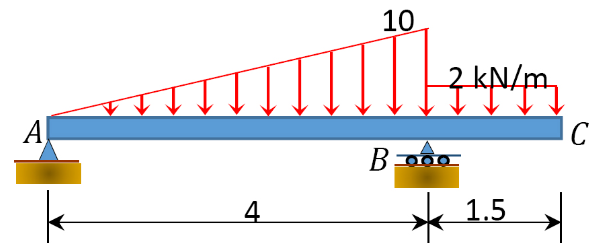

### **Parte III**

**Exercício:**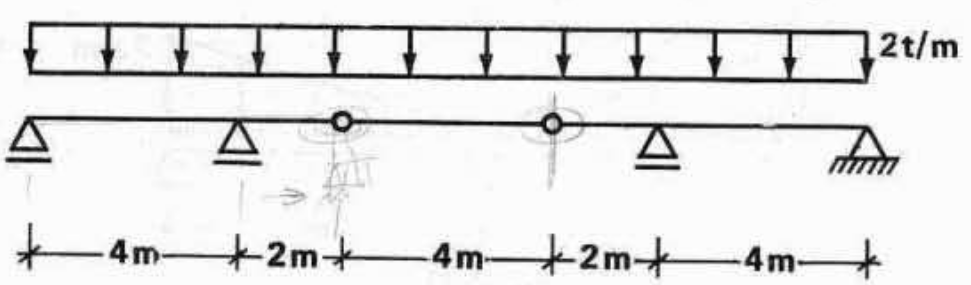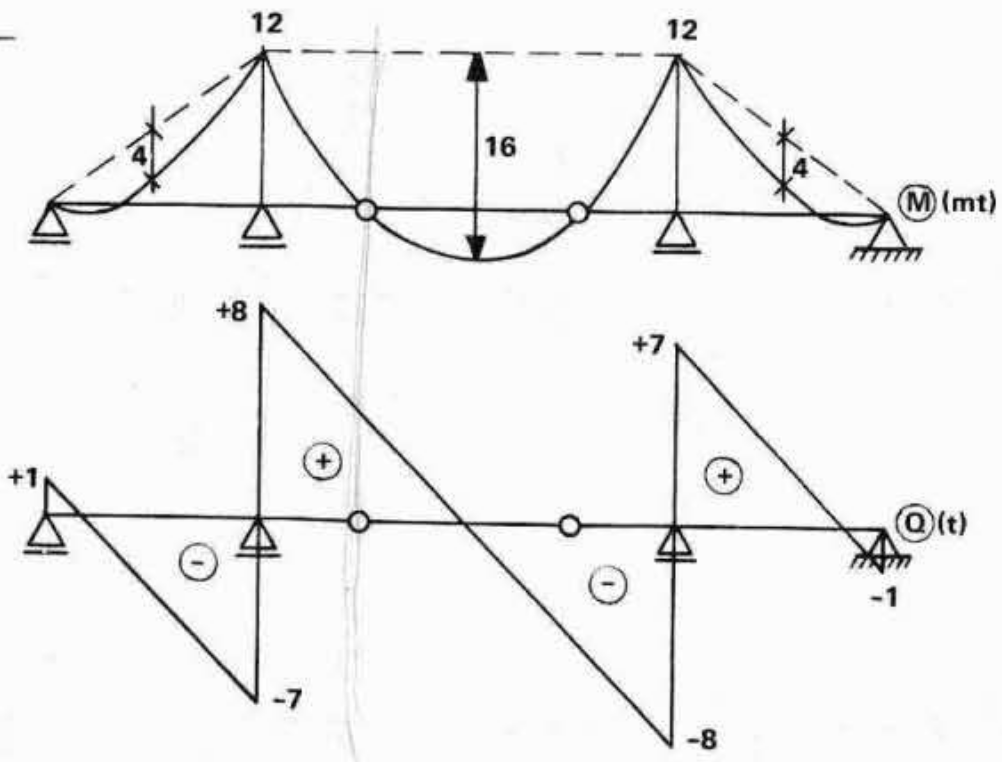